<a href="https://colab.research.google.com/github/firekind/project-fox/blob/master/test/planercnn-dataset-generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install git+https://github.com/longcw/RoIAlign.pytorch

  Cloning https://github.com/longcw/RoIAlign.pytorch to /tmp/pip-req-build-u69l80zs
  Running command git clone -q https://github.com/longcw/RoIAlign.pytorch /tmp/pip-req-build-u69l80zs
  Created wheel for roi-align: filename=roi_align-0.0.2-cp36-cp36m-linux_x86_64.whl size=3597018 sha256=a0c57147d59e80b600135a0527183ce87a3e9c48e9dc2f3317391097e8b81685
  Stored in directory: /tmp/pip-ephem-wheel-cache-_mnqz3v0/wheels/8a/33/67/15dd04358ab544910b805eda00c435bd6de909f4db3e2391ce
Successfully built roi-align


In [ ]:
!git clone https://github.com/firekind/planercnn.git

Cloning into 'planercnn'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 265 (delta 72), reused 76 (delta 40), pack-reused 151
Receiving objects: 100% (265/265), 1.42 MiB | 30.84 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [ ]:
!nvidia-smi

Thu Nov 19 14:44:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
cd planercnn

/content/planercnn


In [ ]:
!ls

anchors    evaluate.py	      models	      requirements.txt
config.py  evaluate_utils.py  options.py      train_planercnn.py
data_prep  example_images     plane_utils.py  utils.py
datasets   LICENSE.md	      README.md       visualize_utils.py


In [ ]:
!wget -O planercnn_checkpoint.zip https://www.dropbox.com/s/5exi5rg54746anx/checkpoint.zip?dl=0
!mkdir -p checkpoint

--2020-11-19 14:44:06--  https://www.dropbox.com/s/5exi5rg54746anx/checkpoint.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5exi5rg54746anx/checkpoint.zip [following]
--2020-11-19 14:44:07--  https://www.dropbox.com/s/raw/5exi5rg54746anx/checkpoint.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucac391055235f496c0f0c06bab5.dl.dropboxusercontent.com/cd/0/inline/BDfQ2-naGVepqQuCqmmsw548PAlcTlfliiiZtlEFxqi8xpGfIlXEJoTqLr94dOXRY7tk5IvQFq5iz9gcpS5-MEBIJMfNmbvkSVh4ioX5TmkSsyxuKexj8knEWeS8dBUA35I/file# [following]
--2020-11-19 14:44:08--  https://ucac391055235f496c0f0c06bab5.dl.dropboxusercontent.com/cd/0/inline/BDfQ2-naGVepqQuCqmmsw548PAlcTlfliiiZtlEFxqi8xpGfIlXEJoTqLr94dOXRY7tk5IvQFq5iz9gcpS5-MEBIJMfNmbvkSVh4i

In [ ]:
!ls

anchors     evaluate.py        options.py		 train_planercnn.py
checkpoint  evaluate_utils.py  planercnn_checkpoint.zip  utils.py
config.py   example_images     plane_utils.py		 visualize_utils.py
data_prep   LICENSE.md	       README.md
datasets    models	       requirements.txt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
## Loading Trained Model
# !mv "checkpoint.zip?dl=0" planercnn_checkpoint.zip
# !mv /content/gdrive/My\ Drive/EVA5/planercnn_checkpoint.zip .
!mv planercnn_checkpoint.zip checkpoint/
%cd checkpoint/
!unzip planercnn_checkpoint.zip
!rm planercnn_checkpoint.zip
%cd ..


/content/planercnn/checkpoint
Archive:  planercnn_checkpoint.zip
   creating: planercnn_normal_warping_refine/
  inflating: planercnn_normal_warping_refine/checkpoint_refine.pth  
  inflating: planercnn_normal_warping_refine/checkpoint.pth  
/content/planercnn


In [ ]:
!ls

anchors     evaluate.py        options.py	   utils.py
checkpoint  evaluate_utils.py  plane_utils.py	   visualize_utils.py
config.py   example_images     README.md
data_prep   LICENSE.md	       requirements.txt
datasets    models	       train_planercnn.py


In [ ]:
# !cp -a /content/gdrive/'My Drive'/EVA5/assignment-13/YoloV3_Dataset .

In [ ]:
# !unzip ./YOLOV3_customdata.zip

In [ ]:
!cp ./example_images/camera.txt /content/gdrive/'My Drive'/EVA5/assignment-13/YoloV3_Dataset/images

In [ ]:
import numpy as np
import os
import shutil

imgs = os.listdir("/content/gdrive/My Drive/EVA5/assignment-13/YoloV3_Dataset/images")
imgs.remove("camera.txt")
train_mini = [f"/content/gdrive/My Drive/EVA5/assignment-13/YoloV3_Dataset/images/{x}" for x in np.random.choice(imgs, size=(64,))]

ds_folder = "/content/train-mini"

if os.path.exists(ds_folder):
    shutil.rmtree(ds_folder)
os.mkdir(ds_folder)

for p in train_mini:
    shutil.copy(p, ds_folder)
shutil.copy("/content/planercnn/example_images/camera.txt", ds_folder)

'/content/train-mini/camera.txt'

In [ ]:
!python evaluate.py --methods=f --suffix=warping_refine --dataset=inference --customDataFolder=/content/gdrive/'My Drive'/EVA5/assignment-13/YoloV3_Dataset/images --numTestingImages=4000 --maskMode=png --noVisualize
# !python evaluate.py --methods=f --suffix=warping_refine --dataset=inference --customDataFolder=/content/train-mini --numTestingImages=4000 --maskMode=png --noVisualize

the number of images 3545
  0% 0/3545 [00:00<?, ?it/s]rm: cannot remove 'test/inference/*_final.png': No such file or directory
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
100% 3545/3545 [18:15<00:00,  3.24it/s]


In [ ]:
!zip -r ../planercnn_data.zip test/inference/

Streaming output truncated to the last 5000 lines.
  adding: test/inference/african-american-woman-wearing-hardhat-and-safety-vest-picture-id475144426.jpg_parameters.npy (deflated 20%)
  adding: test/inference/boots_11.jpg_masks.png (deflated 35%)
  adding: test/inference/8c7d91f7.jpg_parameters.npy (deflated 21%)
  adding: test/inference/LImage_109.jpg_parameters.npy (deflated 20%)
  adding: test/inference/Mimg_021.jpg_masks.png (deflated 31%)
  adding: test/inference/Himage_092.jpg_parameters.npy (deflated 20%)
  adding: test/inference/E13.jpg_masks.png (deflated 32%)
  adding: test/inference/ImageYolo (5).jpg_masks.png (deflated 35%)
  adding: test/inference/majdoor_99.jpg_masks.png (deflated 37%)
  adding: test/inference/z035 .jpg_parameters.npy (deflated 23%)
  adding: test/inference/Dimg066.jpg_parameters.npy (deflated 27%)
  adding: test/inference/manual-worker-in-hard-hat-and-safety-glasses-picture-id184279657.jpg_parameters.npy (deflated 21%)
  adding: test/inference/images55.

In [ ]:
!cp ../planercnn_data.zip /content/gdrive/'My Drive'/EVA5/

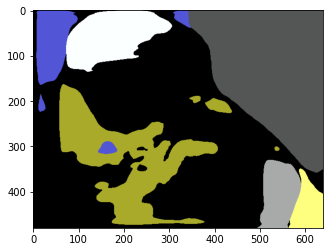

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('test/inference/10_plane_masks_0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()